## Here are some less-ideal models that I tried along with their accuracy and loss curves for their training and validation sets

In [ ]:
import pandas as pd
import numpy as np
import keras
from keras import layers
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout, Rescaling, BatchNormalization
from tensorflow.keras.utils import image_dataset_from_directory
import tensorflow as tf
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# Making data sets from images that are in folders named as their class_label. 
# These scale the images to 70x70 pixels and convert them to grayscale.

column_labels = ['blouse', 'dhoti_pants', 'dupattas', 'gowns', 'kurta_men', 'leggings_and_salwars', 'lehenga', 'mojaris_men', 'mojaris_women', 'nehru_jackets', 'palazzos', 'petticoats', 'sherwanis', 'saree', 'women_kurta']
train_dataset = image_dataset_from_directory(
    '/data/processed/train_w_labels',
    labels='inferred',
    color_mode='grayscale',
    batch_size=256,
    image_size=(70,70),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation='bilinear',
    crop_to_aspect_ratio=False,
    class_names=column_labels)

Found 91166 files belonging to 15 classes.


In [ ]:
val_dataset = image_dataset_from_directory(
    '/data/processed/val_w_labels',
    labels='inferred',
    color_mode='grayscale',
    batch_size=64,
    image_size=(70,70),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation='bilinear',
    crop_to_aspect_ratio=False,
    class_names=column_labels)

Found 7500 files belonging to 15 classes.


In [ ]:
test_dataset = image_dataset_from_directory(
    '/data/processed/test_w_labels',
    labels='inferred',
    color_mode='grayscale',
    batch_size=256,
    image_size=(70,70),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation='bilinear',
    crop_to_aspect_ratio=False,
    class_names=column_labels)

Found 7500 files belonging to 15 classes.


In [ ]:
# Normalizing images
normalization_layer = layers.Rescaling(1./255)
train_ds_norm = train_dataset.map(lambda x, y: (normalization_layer(x), y))
test_ds_norm = test_dataset.map(lambda x, y: (normalization_layer(x), y))
val_ds_norm = test_dataset.map(lambda x, y: (normalization_layer(x), y))

## Grayscale images of size 70x70

In [ ]:
# Setting up model
img_width, img_height = 70, 70
epochs = 500
batch_size = 256
n_classes = 15
input_shape= (img_width, img_height, 1)

In [ ]:
# Keras model
model = Sequential()

model.add(Conv2D(32, (3,3), activation='relu', input_shape=input_shape))
model.add(layers.BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Dropout(0.2))

model.add(Conv2D(64, (3,3), activation='relu'))
model.add(layers.BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Dropout(0.3))

model.add(Conv2D(128, (3,3), activation='relu'))
model.add(layers.BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(140, activation='relu'))
model.add(Dropout(0.4))

model.add(Dense(n_classes, activation='softmax'))

model.compile(loss='SparseCategoricalCrossentropy', optimizer='adam', metrics=['accuracy'])


In [ ]:
# Saving the weights for the highest accuracy value
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath='/models/model_weights/09_20a1.keras',
        save_best_only=True,
        monitor='val_accuracy'
    )]

In [ ]:
# Training model
history = model.fit(
    x=train_ds_norm,
    y=None,
    validation_data= val_ds_norm,
    epochs=epochs,
    verbose="auto",
    callbacks=callbacks,
    validation_split=0.0,
    shuffle=True,
    validation_freq=1,
    batch_size = batch_size
    )

Epoch 1/100
357/357 [==============================] - 36s 67ms/step - loss: 1.5025 - accuracy: 0.5342 - val_loss: 1.8716 - val_accuracy: 0.3823
Epoch 2/100
357/357 [==============================] - 25s 68ms/step - loss: 1.0256 - accuracy: 0.6675 - val_loss: 0.9724 - val_accuracy: 0.6817
Epoch 3/100
357/357 [==============================] - 25s 68ms/step - loss: 0.8850 - accuracy: 0.7123 - val_loss: 0.8078 - val_accuracy: 0.7332
Epoch 4/100
357/357 [==============================] - 25s 68ms/step - loss: 0.7961 - accuracy: 0.7410 - val_loss: 0.6983 - val_accuracy: 0.7700
Epoch 5/100
357/357 [==============================] - 24s 66ms/step - loss: 0.7378 - accuracy: 0.7602 - val_loss: 0.7044 - val_accuracy: 0.7619
Epoch 6/100
357/357 [==============================] - 25s 69ms/step - loss: 0.6769 - accuracy: 0.7807 - val_loss: 0.6472 - val_accuracy: 0.7893
Epoch 7/100
357/357 [==============================] - 25s 69ms/step - loss: 0.6360 - accuracy: 0.7933 - val_loss: 0.6115 - val_ac

In [ ]:
# Loss and accuracy calculation on test data
loss, acc = model.evaluate(x=test_ds_norm, y=None, verbose=2)

30/30 - 1s - loss: 0.9795 - accuracy: 0.8263 - 1s/epoch - 49ms/step


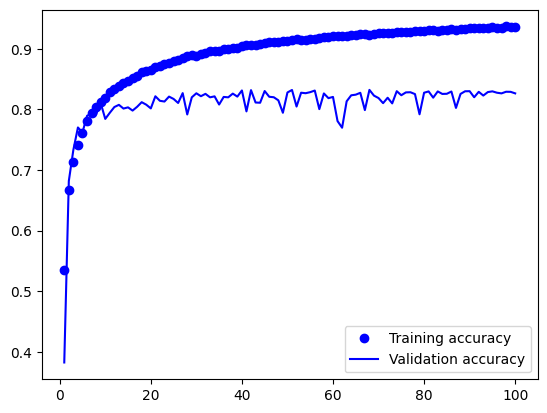

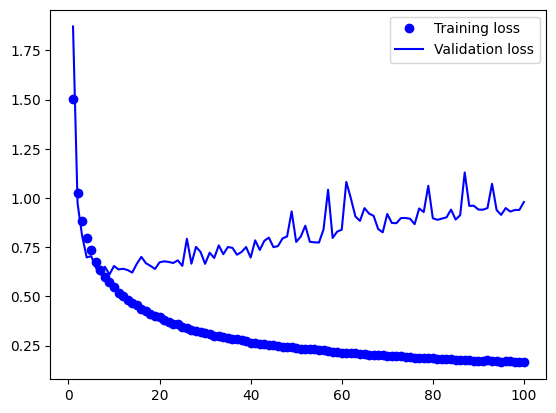

In [ ]:
# Plotting the accuracy and loss values for both the training and validation sets
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.legend()
plt.show()

In [ ]:
# Saving full model
model.save('models/full_models/model_9_20a1.keras')

## Increasing final dropout to 50%

In [ ]:
# Setting up model
img_width, img_height = 70, 70
epochs = 100
batch_size = 256
n_classes = 15
input_shape= (img_width, img_height, 1)

In [ ]:
# Keras model
model1 = Sequential()

model1.add(Conv2D(32, (3,3), activation='relu', input_shape=input_shape))
model1.add(layers.BatchNormalization())
model1.add(MaxPooling2D(pool_size=(2, 2)))

model1.add(Dropout(0.2))

model1.add(Conv2D(64, (3,3), activation='relu'))
model1.add(layers.BatchNormalization())
model1.add(MaxPooling2D(pool_size=(2, 2)))

model1.add(Dropout(0.3))

model1.add(Conv2D(128, (3,3), activation='relu'))
model1.add(layers.BatchNormalization())
model1.add(MaxPooling2D(pool_size=(2, 2)))

model1.add(Flatten())

model1.add(Dense(140, activation='relu'))
model1.add(Dropout(0.5))

model1.add(Dense(n_classes, activation='softmax'))

model1.compile(loss='SparseCategoricalCrossentropy', optimizer='adam', metrics=['accuracy'])


In [ ]:
# Saving the weights for the highest accuracy value
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath='/models/model_weights/09_20a2.keras',
        save_best_only=True,
        monitor='val_accuracy'
    )]

In [ ]:
# Training model
history1 = model1.fit(
    x=train_ds_norm,
    y=None,
    validation_data= val_ds_norm,
    epochs=epochs,
    verbose="auto",
    callbacks=callbacks,
    validation_split=0.0,
    shuffle=True,
    validation_freq=1,
    batch_size = batch_size
    )

Epoch 1/100
357/357 [==============================] - 27s 67ms/step - loss: 1.6247 - accuracy: 0.4878 - val_loss: 2.3630 - val_accuracy: 0.2797
Epoch 2/100
357/357 [==============================] - 25s 69ms/step - loss: 1.1377 - accuracy: 0.6252 - val_loss: 1.0700 - val_accuracy: 0.6424
Epoch 3/100
357/357 [==============================] - 25s 69ms/step - loss: 0.9907 - accuracy: 0.6751 - val_loss: 0.8063 - val_accuracy: 0.7319
Epoch 4/100
357/357 [==============================] - 24s 67ms/step - loss: 0.8908 - accuracy: 0.7074 - val_loss: 0.8066 - val_accuracy: 0.7312
Epoch 5/100
357/357 [==============================] - 24s 66ms/step - loss: 0.8176 - accuracy: 0.7315 - val_loss: 0.8704 - val_accuracy: 0.7056
Epoch 6/100
357/357 [==============================] - 25s 69ms/step - loss: 0.7599 - accuracy: 0.7500 - val_loss: 0.6669 - val_accuracy: 0.7813
Epoch 7/100
357/357 [==============================] - 24s 66ms/step - loss: 0.7134 - accuracy: 0.7655 - val_loss: 0.7455 - val_ac

In [ ]:
# Loss and accuracy calculation on test data
loss, acc = model1.evaluate(x=test_ds_norm, y=None, verbose=2)

30/30 - 2s - loss: 0.8660 - accuracy: 0.8267 - 2s/epoch - 51ms/step


In [ ]:
# Saving full model
model1.save('models/full_models/model_9_20a2.keras')

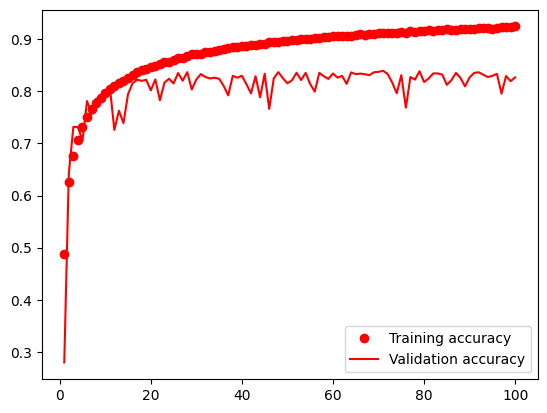

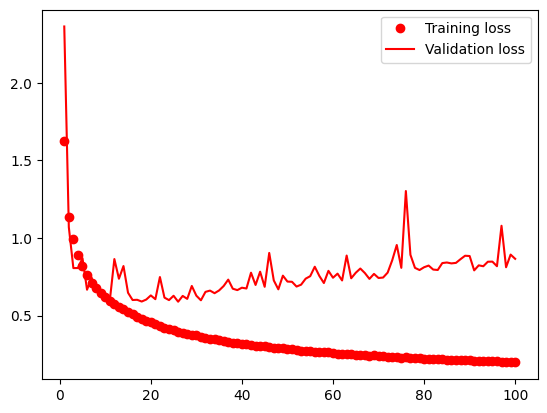

In [ ]:
# Plotting the accuracy and loss values for both the training and validation sets
accuracy = history1.history['accuracy']
val_accuracy = history1.history['val_accuracy']
loss = history1.history['loss']
val_loss = history1.history['val_loss']
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, 'ro', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'r', label='Validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'ro', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.legend()
plt.show()

## Increasing first two dropout percents

In [ ]:
# Setting up model
img_width, img_height = 70, 70
epochs = 100
batch_size = 256
n_classes = 15
input_shape= (img_width, img_height, 1)

In [ ]:
# Keras model
model3 = Sequential()

model3.add(Conv2D(32, (3,3), activation='relu', input_shape=input_shape))
model3.add(layers.BatchNormalization())
model3.add(MaxPooling2D(pool_size=(2, 2)))

model3.add(Dropout(0.5))

model3.add(Conv2D(64, (3,3), activation='relu'))
model3.add(layers.BatchNormalization())
model3.add(MaxPooling2D(pool_size=(2, 2)))

model3.add(Dropout(0.5))

model3.add(Conv2D(128, (3,3), activation='relu'))
model3.add(layers.BatchNormalization())
model3.add(MaxPooling2D(pool_size=(2, 2)))

model3.add(Flatten())

model3.add(Dense(140, activation='relu'))
model3.add(Dropout(0.5))

model3.add(Dense(n_classes, activation='softmax'))

model3.compile(loss='SparseCategoricalCrossentropy', optimizer='adam', metrics=['accuracy'])


In [ ]:
# Saving the weights for the highest accuracy value
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath='/models/model_weights/09_20a4.keras',
        save_best_only=True,
        monitor='val_accuracy'
    )]

In [ ]:
# Training model
history3 = model3.fit(
    x=train_ds_norm,
    y=None,
    validation_data= val_ds_norm,
    epochs=epochs,
    verbose="auto",
    callbacks=callbacks,
    validation_split=0.0,
    shuffle=True,
    validation_freq=1,
    batch_size = batch_size
    )

Epoch 1/100
357/357 [==============================] - 27s 67ms/step - loss: 1.9007 - accuracy: 0.3962 - val_loss: 2.3482 - val_accuracy: 0.2857
Epoch 2/100
357/357 [==============================] - 25s 69ms/step - loss: 1.3705 - accuracy: 0.5406 - val_loss: 1.2979 - val_accuracy: 0.5649
Epoch 3/100
357/357 [==============================] - 25s 68ms/step - loss: 1.2090 - accuracy: 0.5948 - val_loss: 1.1048 - val_accuracy: 0.6235
Epoch 4/100
357/357 [==============================] - 25s 68ms/step - loss: 1.0913 - accuracy: 0.6342 - val_loss: 0.8861 - val_accuracy: 0.7009
Epoch 5/100
357/357 [==============================] - 24s 66ms/step - loss: 1.0123 - accuracy: 0.6658 - val_loss: 1.0181 - val_accuracy: 0.6653
Epoch 6/100
357/357 [==============================] - 25s 68ms/step - loss: 0.9471 - accuracy: 0.6880 - val_loss: 0.8532 - val_accuracy: 0.7148
Epoch 7/100
357/357 [==============================] - 25s 69ms/step - loss: 0.8890 - accuracy: 0.7069 - val_loss: 0.7601 - val_ac

In [ ]:
# Loss and accuracy calculation on test data
loss, acc = model3.evaluate(x=test_ds_norm, y=None, verbose=2)

30/30 - 2s - loss: 0.7535 - accuracy: 0.8357 - 2s/epoch - 51ms/step


In [ ]:
# Saving full model
model3.save('models/full_models/model_9_20a4.keras')

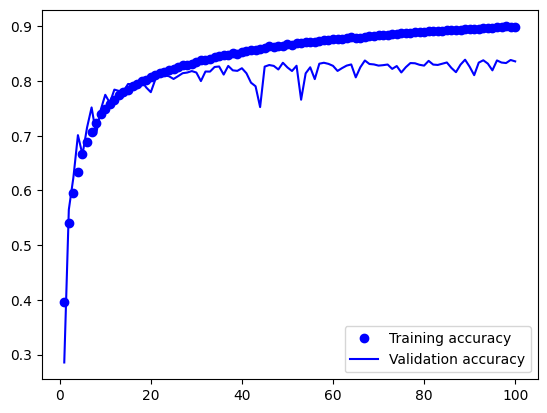

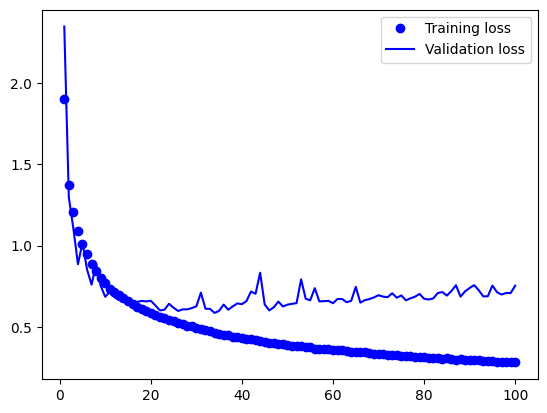

In [ ]:
# Plotting the accuracy and loss values for both the training and validation sets
accuracy = history3.history['accuracy']
val_accuracy = history3.history['val_accuracy']
loss = history3.history['loss']
val_loss = history3.history['val_loss']
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.legend()
plt.show()

In [ ]:
# Saving full model
model3.save('models/full_models/model_9_20a6.keras')

## Removing Conv2D(128) layer and adding another Conv2D(32) one

In [ ]:
# Setting up model
img_width, img_height = 70,70
epochs = 100
batch_size = 256
n_classes = 15
input_shape= (img_width, img_height, 1)

In [ ]:
# Keras model
model4 = Sequential()

model4.add(Conv2D(32, (3,3), activation='relu', input_shape=input_shape))
model4.add(layers.BatchNormalization())
model4.add(MaxPooling2D(pool_size=(2, 2)))

model4.add(Dropout(0.5))

model4.add(Conv2D(32, (3,3), activation='relu'))
model4.add(layers.BatchNormalization())
model4.add(MaxPooling2D(pool_size=(2, 2)))

model4.add(Dropout(0.5))

model4.add(Conv2D(64, (3,3), activation='relu'))
model4.add(layers.BatchNormalization())
model4.add(MaxPooling2D(pool_size=(2, 2)))

model4.add(Flatten())

model4.add(Dense(140, activation='relu'))
model4.add(Dropout(0.5))

model4.add(Dense(n_classes, activation='softmax'))

model4.compile(loss='SparseCategoricalCrossentropy', optimizer='adam', metrics=['accuracy'])


In [ ]:
# Saving the weights for the highest accuracy value
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath='models/model_weights/09_20a5.keras',
        save_best_only=True,
        monitor='val_accuracy'
    )]

In [ ]:
# Training model
history4 = model4.fit(
    x=train_ds_norm,
    y=None,
    validation_data= val_ds_norm,
    epochs=epochs,
    verbose="auto",
    callbacks=callbacks,
    validation_split=0.0,
    shuffle=True,
    validation_freq=1,
    batch_size = batch_size
    )

Epoch 1/100
357/357 [==============================] - 24s 56ms/step - loss: 1.7959 - accuracy: 0.4368 - val_loss: 3.0216 - val_accuracy: 0.2657
Epoch 2/100
357/357 [==============================] - 20s 55ms/step - loss: 1.2494 - accuracy: 0.5965 - val_loss: 1.5012 - val_accuracy: 0.5540
Epoch 3/100
357/357 [==============================] - 20s 56ms/step - loss: 1.0938 - accuracy: 0.6455 - val_loss: 1.0151 - val_accuracy: 0.6576
Epoch 4/100
357/357 [==============================] - 20s 54ms/step - loss: 0.9994 - accuracy: 0.6739 - val_loss: 0.9490 - val_accuracy: 0.6897
Epoch 5/100
357/357 [==============================] - 19s 53ms/step - loss: 0.9330 - accuracy: 0.6962 - val_loss: 0.9987 - val_accuracy: 0.6839
Epoch 6/100
357/357 [==============================] - 20s 56ms/step - loss: 0.8767 - accuracy: 0.7157 - val_loss: 0.9248 - val_accuracy: 0.7119
Epoch 7/100
357/357 [==============================] - 20s 55ms/step - loss: 0.8365 - accuracy: 0.7286 - val_loss: 0.8449 - val_ac

In [ ]:
# Loss and accuracy calculation on test data
loss, acc = model4.evaluate(x=test_ds_norm, y=None, verbose=2)

30/30 - 1s - loss: 0.6138 - accuracy: 0.8288 - 1s/epoch - 49ms/step


In [ ]:
# Saving full model
model4.save('models/full_models/model_9_20a6.keras')

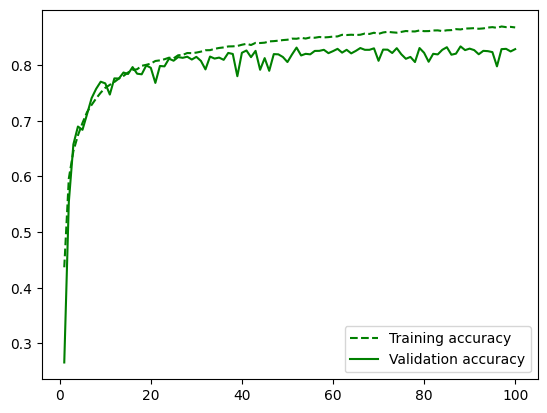

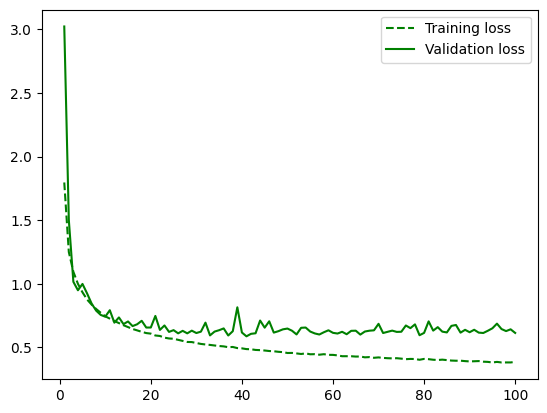

In [ ]:
# Plotting the accuracy and loss values for both the training and validation sets
accuracy = history4.history['accuracy']
val_accuracy = history4.history['val_accuracy']
loss = history4.history['loss']
val_loss = history4.history['val_loss']
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, 'g--', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'g', label='Validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'g--', label='Training loss')
plt.plot(epochs, val_loss, 'g', label='Validation loss')
plt.legend()
plt.show()

In [ ]:
# Making data sets from images that are in folders named as their class_label. 
# These scale the images to 70x70 pixels and keep them RGB.
column_labels = ['blouse', 'dhoti_pants', 'dupattas', 'gowns', 'kurta_men', 'leggings_and_salwars', 'lehenga', 'mojaris_men', 'mojaris_women', 'nehru_jackets', 'palazzos', 'petticoats', 'sherwanis', 'saree', 'women_kurta']
train_dataset = image_dataset_from_directory(
    '/content/train_w_labels',
    labels='inferred',
    color_mode='rgb',
    batch_size=256,
    image_size=(70,70),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation='bilinear',
    crop_to_aspect_ratio=False,
    class_names=column_labels)

Found 91166 files belonging to 15 classes.


In [ ]:
val_dataset = image_dataset_from_directory(
    '/content/val_w_labels',
    labels='inferred',
    color_mode='rgb',
    batch_size=256,
    image_size=(70,70),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation='bilinear',
    crop_to_aspect_ratio=False,
    class_names=column_labels)

Found 7500 files belonging to 15 classes.


In [ ]:
test_dataset = image_dataset_from_directory(
    '/content/test_w_labels',
    labels='inferred',
    color_mode='rgb',
    batch_size=256,
    image_size=(70,70),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation='bilinear',
    crop_to_aspect_ratio=False,
    class_names=column_labels)

Found 7500 files belonging to 15 classes.


In [ ]:
# Normalizing images
normalization_layer = layers.Rescaling(1./255)
train_ds_norm = train_dataset.map(lambda x, y: (normalization_layer(x), y))
test_ds_norm = test_dataset.map(lambda x, y: (normalization_layer(x), y))
val_ds_norm = test_dataset.map(lambda x, y: (normalization_layer(x), y))

## Trying model 3 but with RGB images

In [ ]:
# Setting up model
img_width, img_height = 70,70
epochs = 150
batch_size = 256
n_classes = 15
input_shape= (img_width, img_height, 3)

In [ ]:
# Keras model
model5 = Sequential()

model5.add(Conv2D(32, (3,3), activation='relu', input_shape=input_shape))
model5.add(layers.BatchNormalization())
model5.add(MaxPooling2D(pool_size=(2, 2)))

model5.add(Dropout(0.5))

model5.add(Conv2D(64, (3,3), activation='relu'))
model5.add(layers.BatchNormalization())
model5.add(MaxPooling2D(pool_size=(2, 2)))

model5.add(Dropout(0.5))

model5.add(Conv2D(128, (3,3), activation='relu'))
model5.add(layers.BatchNormalization())
model5.add(MaxPooling2D(pool_size=(2, 2)))

model5.add(Flatten())

model5.add(Dense(140, activation='relu'))
model5.add(Dropout(0.5))

model5.add(Dense(n_classes, activation='softmax'))

model5.compile(loss='SparseCategoricalCrossentropy', optimizer='adam', metrics=['accuracy'])


In [ ]:
# Saving the weights for the highest accuracy value
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath='models/model_weights/09_20a5.keras',
        save_best_only=True,
        monitor='val_accuracy'
    )]

In [ ]:
# Training model
history5 = model5.fit(
    x=train_ds_norm,
    y=None,
    validation_data= val_ds_norm,
    epochs=epochs,
    verbose="auto",
    callbacks=callbacks,
    validation_split=0.0,
    shuffle=True,
    validation_freq=1,
    batch_size = batch_size
    )

Epoch 1/150
357/357 [==============================] - 30s 75ms/step - loss: 1.8712 - accuracy: 0.4086 - val_loss: 1.7984 - val_accuracy: 0.4088
Epoch 2/150
357/357 [==============================] - 27s 74ms/step - loss: 1.4096 - accuracy: 0.5314 - val_loss: 1.1544 - val_accuracy: 0.5932
Epoch 3/150
357/357 [==============================] - 27s 75ms/step - loss: 1.2472 - accuracy: 0.5803 - val_loss: 1.0640 - val_accuracy: 0.6184
Epoch 4/150
357/357 [==============================] - 28s 78ms/step - loss: 1.1403 - accuracy: 0.6178 - val_loss: 1.1171 - val_accuracy: 0.6233
Epoch 5/150
357/357 [==============================] - 27s 75ms/step - loss: 1.0528 - accuracy: 0.6478 - val_loss: 0.8714 - val_accuracy: 0.6909
Epoch 6/150
357/357 [==============================] - 27s 75ms/step - loss: 0.9788 - accuracy: 0.6730 - val_loss: 0.8386 - val_accuracy: 0.7097
Epoch 7/150
357/357 [==============================] - 27s 75ms/step - loss: 0.9187 - accuracy: 0.6944 - val_loss: 0.7789 - val_ac

In [ ]:
# Loss and accuracy calculation on test data
loss, acc = model5.evaluate(x=test_ds_norm, y=None, verbose=2)

30/30 - 2s - loss: 0.8258 - accuracy: 0.8220 - 2s/epoch - 61ms/step


In [ ]:
# Saving full model
model5.save('models/full_models/model_9_20a6.keras')

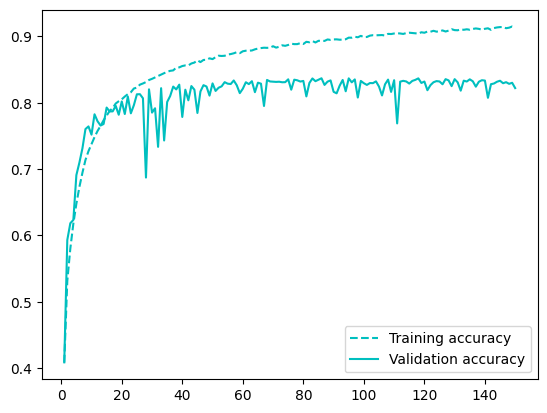

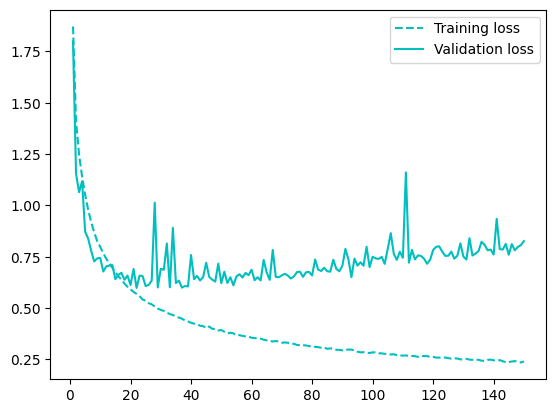

In [ ]:
# Plotting the accuracy and loss values for both the training and validation sets
accuracy = history5.history['accuracy']
val_accuracy = history5.history['val_accuracy']
loss = history5.history['loss']
val_loss = history5.history['val_loss']
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, 'c--', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'c', label='Validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'c--', label='Training loss')
plt.plot(epochs, val_loss, 'c', label='Validation loss')
plt.legend()
plt.show()

## Recap of other accuracy and loss curves:

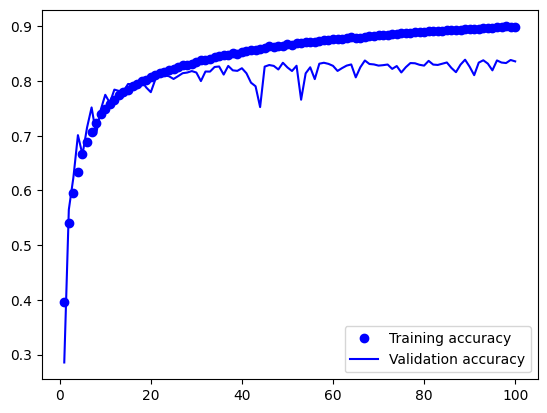

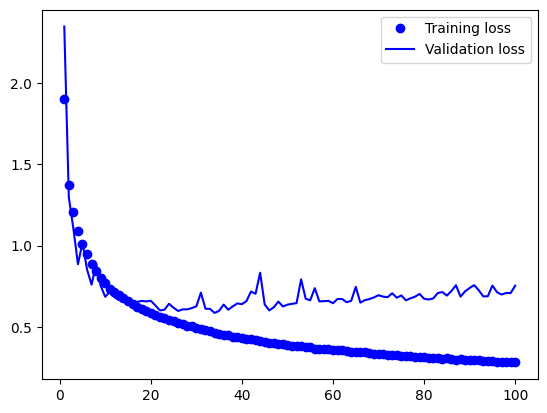

In [ ]:
# Plotting the accuracy and loss values for both the training and validation sets
accuracy = history3.history['accuracy']
val_accuracy = history3.history['val_accuracy']
loss = history3.history['loss']
val_loss = history3.history['val_loss']
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.legend()
plt.show()

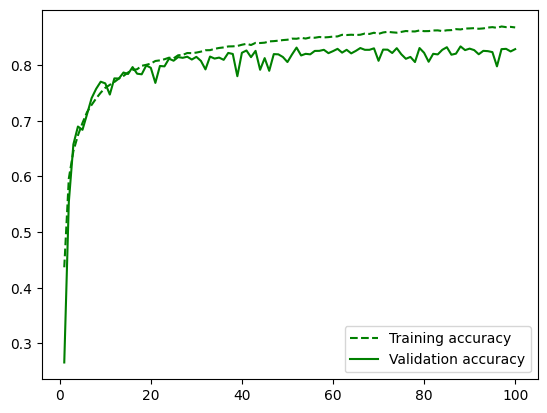

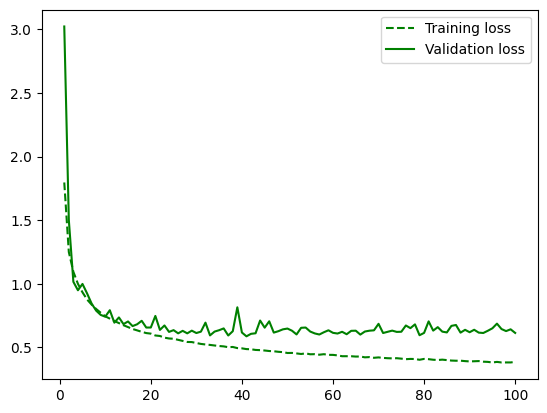

In [ ]:
# Plotting the accuracy and loss values for both the training and validation sets
accuracy = history4.history['accuracy']
val_accuracy = history4.history['val_accuracy']
loss = history4.history['loss']
val_loss = history4.history['val_loss']
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, 'g--', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'g', label='Validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'g--', label='Training loss')
plt.plot(epochs, val_loss, 'g', label='Validation loss')
plt.legend()
plt.show()

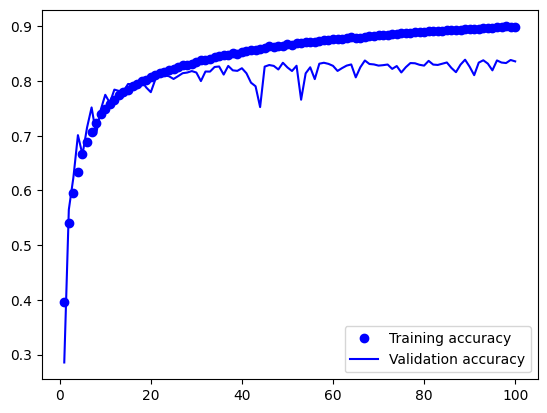

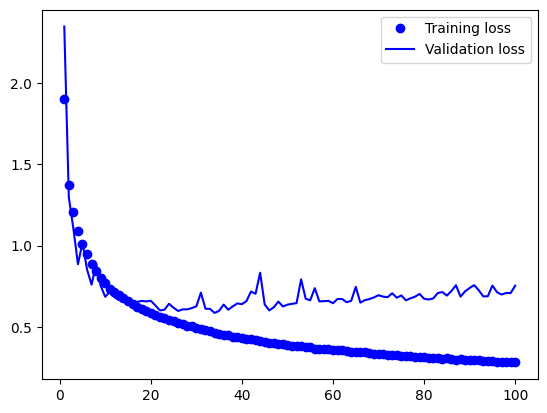

In [ ]:
# Plotting the accuracy and loss values for both the training and validation sets
accuracy = history3.history['accuracy']
val_accuracy = history3.history['val_accuracy']
loss = history3.history['loss']
val_loss = history3.history['val_loss']
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.legend()
plt.show()

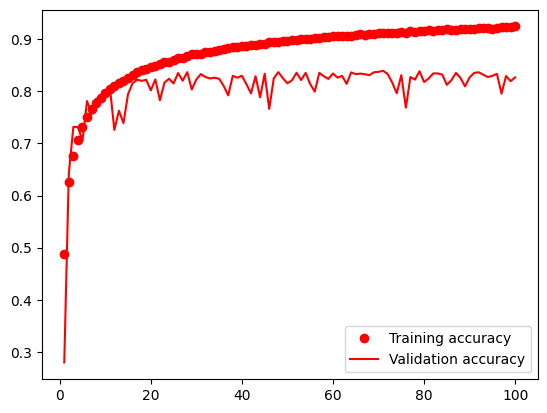

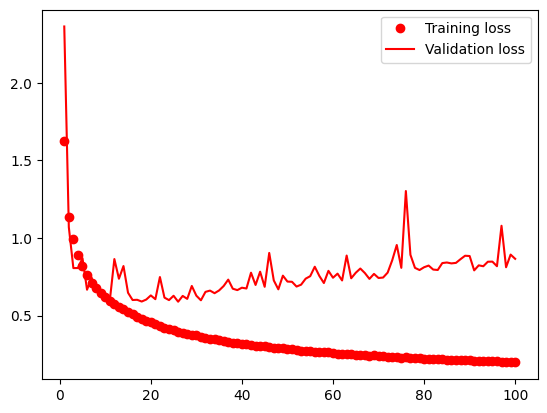

In [ ]:
# Plotting the accuracy and loss values for both the training and validation sets
accuracy = history1.history['accuracy']
val_accuracy = history1.history['val_accuracy']
loss = history1.history['loss']
val_loss = history1.history['val_loss']
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, 'ro', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'r', label='Validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'ro', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.legend()
plt.show()

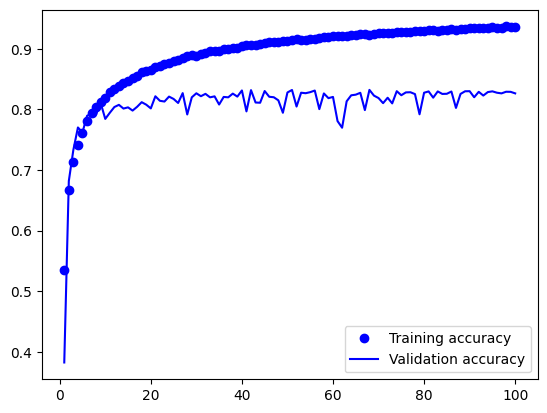

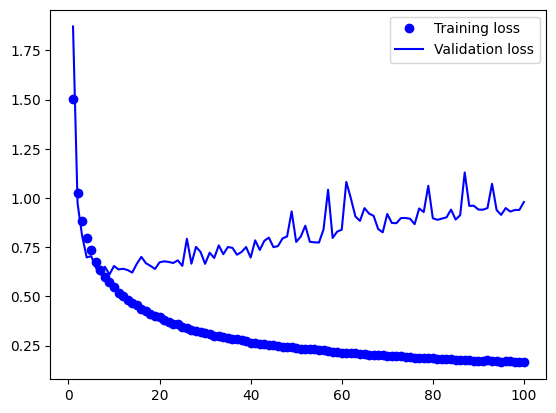

In [ ]:
# Plotting the accuracy and loss values for both the training and validation sets
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.legend()
plt.show()

## The plots in green (model 4) shows the least overfitting because the training and validation curves are closer together than in any other models. The curve above (first model labeled just as model) is the most overfit because training and validation curves diverge the most. However, the model with the highest test accuracy is model 3 (83.57%). 